In [1]:
import numpy as np
import sklearn.metrics as skmetrics
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets as skdata

In [20]:
'''
Name: Escalante, Tomas

Collaborators: N/A

Collaboration details: N/A

Summary:
Report your scores here.

'''

'\nName: Tomas Escalante\n\nCollaborators: N/A\n\nCollaboration details: N/A\n\nSummary:\nReport your scores here.\n\n'

In [3]:
def plot_scatters(X, colors, labels, markers, title, axis_names, plot_3d=False):
    '''
    Creates scatter plot

    Args:
        X : list[numpy]
            list of numpy arrays (must have 3 dimensions for 3d plot)
        colors : list[str]
            list of colors to use
        labels : list[str]
            list of labels for legends
        markers : list[str]
            list of markers to use
        axis_names : list[str]
            names of each axis
        title : str
            title of plot
        plot_3d : bool
            if set, creates 3d plot, requires 3d data
    '''

    # Make sure data matches colors, labels, markers
    assert len(X) == len(colors)
    assert len(X) == len(labels)
    assert len(X) == len(markers)

    # Make sure we have right data type and number of axis names
    if plot_3d:
        assert X[0].shape[1] == 3
        assert len(axis_names) == 3
    else:
        assert X[0].shape[1] == 2
        assert len(axis_names) == 2

    fig = plt.figure()
    fig.suptitle(title)

    if plot_3d:
        ax = fig.add_subplot(1, 1, 1, projection='3d')
        ax.set_xlabel(axis_names[0])
        ax.set_ylabel(axis_names[1])
        ax.set_zlabel(axis_names[2])

        for x, c, l, m in zip(X, colors, labels, markers):
            ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=c, label=l, marker=m)
            ax.legend(loc='best')
    else:
        ax = fig.add_subplot(1, 1, 1)
        ax.set_xlabel(axis_names[0])
        ax.set_ylabel(axis_names[1])

        for x, c, l, m in zip(X, colors, labels, markers):
            ax.scatter(x[:, 0], x[:, 1], c=c, label=l, marker=m)
            ax.legend(loc='best')

In [18]:
'''
Implementation of Principal Component Analysis (PCA) for dimensionality reduction
'''
class PrincipalComponentAnalysis(object):

    def __init__(self, k):
        # Number of eigenvectors to keep
        self.__k = k

        # Mean of the dataset
        self.__mean = None

        # Linear weights or transformation to project to lower subspace
        self.__weights = None

    def __center(self, X):
        '''
        Centers the data to zero-mean

        Args:
            X : numpy
                N x d feature vector

        Returns:
            numpy : N x d centered feature vector
        '''

        # TODO: Center the data
        
        # B = X - mu
        # mu = 1/N * sum(x^n)
        self.__mean = np.mean(X)
        
        B = X - self.__mean

        return B

    def __covariance_matrix(self, X):
        '''
        Computes the covariance matrix of a feature vector

        Args:
            X : numpy
                N x d feature vector

        Returns:
            numpy : d x d covariance matrix
        '''

        # TODO: Compute the covariance matrix
        
        # C = 1/(N-1) * B.T * B
        B = self.__center(X)
        C = (1/(X.shape[0]-1)) * np.matmul(B.T, B)

        return C

    def __fetch_weights(self, C):
        '''
        Obtains the top k eigenvectors (weights) from a covariance matrix C

        Args:
            C : numpy
                d x d covariance matrix

        Returns:
            numpy : d x k eigenvectors
        '''

        # TODO: Obtain the top k eigenvectors
        # Make sure k is less than or equal to d (d is D in slides, k is d in slides)
        assert self.__k <= C.shape[0]

        # Eigen decomp: V^-1 * C * V = (S)
        S, V = np.linalg.eig(C)

        # S is singular values or eigenvalues
        # So we want to sort them in descending order
        # and we care about the positions of the new ordering
        # We will use np.argsort which sorts in ascending order
        # We want descending order so we will reverse it
        # Order is the indices of the eigenvalues, which corresponds to eigenvectors
        order = np.argsort(S)[::-1]

        # Select the top k eigenvectors from V (d x d)
        # V[:, order] rearranges V from largest to smallest based on S
        # Now W is (d x k), this is our latent variable that we want to return
        W = V[:, order][:, 0:self.__k]

        return W

    def project_to_subspace(self, X):
        '''
        Project data X to lower dimension subspace using the top k eigenvectors

        Args:
            X : numpy
                N x d covariance matrix
            k : int
                number of eigenvectors to keep

        Returns:
            numpy : N x k feature vector
        '''

        # TODO: Computes transformation to lower dimension and project to subspace

        # Center your data
        B = self.__center(X)

        # Compute the covariance matrix
        C = self.__covariance_matrix(X)

        # Find the weights (W) that can take us from d to k dimensions
        # and set them to self.__weights
        self.__weights = self.__fetch_weights(C)

        # Project X down to k dimensions using the weights to yield Z
        Z = np.matmul(B, self.__weights)

        # Return Z
        return Z

    def reconstruct_from_subspace(self, Z):
        '''
        Reconstruct the original feature vector from the latent vector

        Args:
            Z : numpy
                N x k latent vector

        Returns:
            numpy : N x d feature vector
        '''

        # TODO: Reconstruct the original feature vector
        X = np.matmul(Z, (self.__weights).T) + self.__mean

        return X

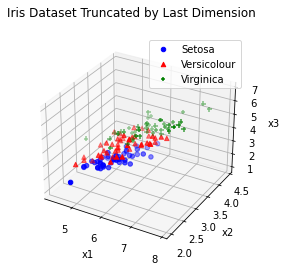

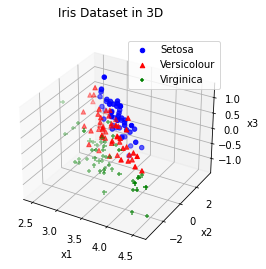

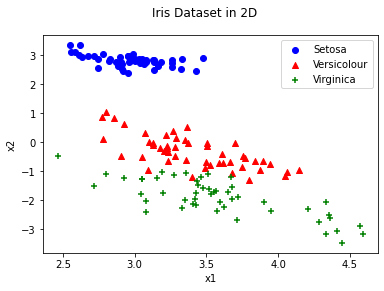

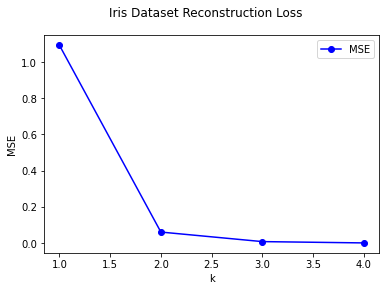

In [19]:
if __name__ == '__main__':

    # Load the iris dataset 150 samples of 4 dimensions
    iris_dataset = skdata.load_iris()
    X_iris = iris_dataset.data
    y_iris = iris_dataset.target

    # Initialize plotting colors, labels and markers for iris dataset
    colors_iris = ('blue', 'red', 'green')
    labels_iris = ('Setosa', 'Versicolour', 'Virginica')
    markers_iris = ('o', '^', '+')

    # Visualize iris dataset by truncating the last dimension

    # Iris dataset is (150, 4), so we remove the last dimension to yield (150, 3)
    X_iris_trunc = X_iris[:, 0:3]

    # Find ever sample of X that belongs to class 0, 1, 2 separately
    X_iris_trunc_class_split = [X_iris_trunc[np.where(y_iris == 0)[0], :],
                                X_iris_trunc[np.where(y_iris == 1)[0], :],
                                X_iris_trunc[np.where(y_iris == 2)[0], :]]

    plot_scatters(X = X_iris_trunc_class_split,
                  colors = colors_iris,
                  labels = labels_iris,
                  markers = markers_iris,
                  title = 'Iris Dataset Truncated by Last Dimension',
                  axis_names = ['x1', 'x2', 'x3'],
                  plot_3d = True)

    # TODO: Initialize Principal Component Analysis instance for k = 3
    PCA_3d = PrincipalComponentAnalysis(3)

    # TODO: Visualize iris dataset in 3 dimension
    X_iris_3d = PCA_3d.project_to_subspace(X_iris)
    X_iris_3d_class_split = [X_iris_3d[np.where(y_iris == 0)[0], :],
                             X_iris_3d[np.where(y_iris == 1)[0], :],
                             X_iris_3d[np.where(y_iris == 2)[0], :]]
    
    plot_scatters(X = X_iris_3d_class_split,
                  colors = colors_iris,
                  labels = labels_iris,
                  markers = markers_iris,
                  title = 'Iris Dataset in 3D',
                  axis_names = ['x1', 'x2', 'x3'],
                  plot_3d = True)
    
    # TODO: Initialize Principal Component Analysis instance for k = 2
    PCA_2d = PrincipalComponentAnalysis(2)

    # TODO: Visualize iris dataset in 2 dimensions
    X_iris_2d = PCA_2d.project_to_subspace(X_iris)
    X_iris_2d_class_split = [X_iris_2d[np.where(y_iris == 0)[0], :],
                             X_iris_2d[np.where(y_iris == 1)[0], :],
                             X_iris_2d[np.where(y_iris == 2)[0], :]]
    
    plot_scatters(X = X_iris_2d_class_split,
                  colors = colors_iris,
                  labels = labels_iris,
                  markers = markers_iris,
                  title = 'Iris Dataset in 2D',
                  axis_names = ['x1', 'x2'],
                  plot_3d = False)

    # Possible number of eigenvectors to keep
    K = [4, 3, 2, 1]

    # MSE scores to keep track of loss from compression
    mse_scores = []

    for k in K:
        # TODO: Initialize PrincipalComponentAnalysis instance for k
        PCA = PrincipalComponentAnalysis(k)

        # TODO: Project the data to subspace
        X_iris_PCA = PCA.project_to_subspace(X_iris)

        # TODO: Reconstruct the original data
        X_iris_reconstructed = PCA.reconstruct_from_subspace(X_iris_PCA)

        # TODO: Measures mean squared error between original data and reconstructed data
        mse_score = mse = skmetrics.mean_squared_error(X_iris_reconstructed, X_iris)

        # Save MSE score
        mse_scores.append(mse_score)

    # Creat plot for MSE for reconstruction
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.suptitle('Iris Dataset Reconstruction Loss')

    ax.plot(K, mse_scores, marker='o', color='b', label='MSE')
    ax.legend(loc='best')
    ax.set_xlabel('k')
    ax.set_ylabel('MSE')

    # Show plots
    plt.show()